# Stacking in classification 1.0 [”Stroke_Prediction”]
The stacking method from models of different families gives very good results. Today we will deal with the classification. We will also see how important it is to use Oversampling

https://github.com/dawidkopczyk/blog/blob/master/stacking.py

In [1]:
# General
import numpy as np

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Utilities
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from copy import copy as make_copy
import warnings   
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/Stroke_Prediction.csv')
print(df.shape)
df.head(2)


(43400, 12)


,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0


In [3]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b


print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Gender --- object
Ever_Married --- object
Type_Of_Work --- object
Residence --- object
Smoking_Status --- object


In [4]:
del df['ID']
df = df.dropna(how='any')
df.isnull().sum()

Gender            0
Age_In_Days       0
Hypertension      0
Heart_Disease     0
Ever_Married      0
Type_Of_Work      0
Residence         0
Avg_Glucose       0
BMI               0
Smoking_Status    0
Stroke            0
dtype: int64

In [5]:
df.shape

(41938, 11)

In [6]:
y = df['Stroke']
X = df.drop('Stroke', axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

In [8]:
y_train.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')

In [9]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Establishing first level estimators (level 0)

In [10]:
base_clf = [LogisticRegression(), RandomForestClassifier(), ### jakie model chce trenować
            AdaBoostClassifier(), GaussianNB(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=0, n_estimators=100)]

stck_clf = LogisticRegression()  ### układanie w stos odbyw się za pomocą LogisticRegression
#stck_clf = RandomForestClassifier()

## We create first level forecasts (level 0)

LogisticRegression Accuracy: 98.40%


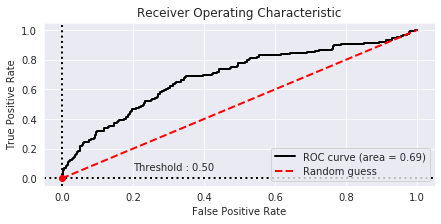

AUC_train: 0.690
AUC_test:  0.688
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------
RandomForestClassifier Accuracy: 98.50%


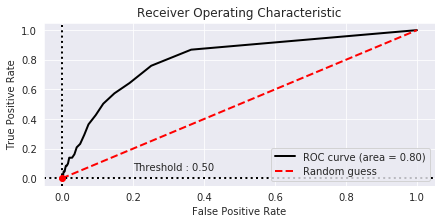

AUC_train: 1.000
AUC_test:  0.803
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------
AdaBoostClassifier Accuracy: 98.50%


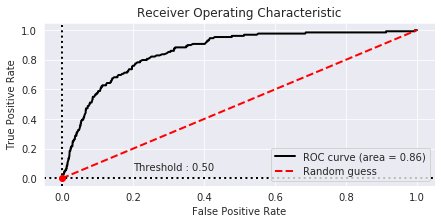

AUC_train: 0.871
AUC_test:  0.856
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------
GaussianNB Accuracy: 94.90%


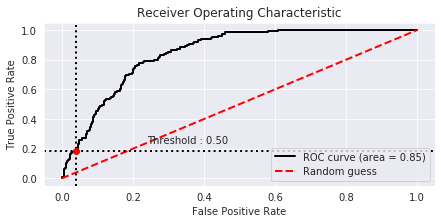

AUC_train: 0.840
AUC_test:  0.847
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8259
           1       0.07      0.19      0.10       129

    accuracy                           0.95      8388
   macro avg       0.53      0.57      0.54      8388
weighted avg       0.97      0.95      0.96      8388

--------------------------------------------------------
XGBClassifier Accuracy: 98.40%


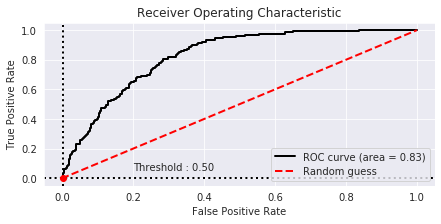

AUC_train: 0.988
AUC_test:  0.826
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------
LGBMClassifier Accuracy: 98.50%


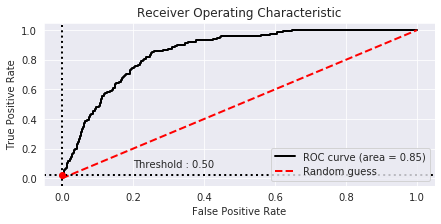

AUC_train: 0.990
AUC_test:  0.853
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.33      0.01      0.02       129

    accuracy                           0.98      8388
   macro avg       0.66      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------
CatBoostClassifier Accuracy: 98.50%


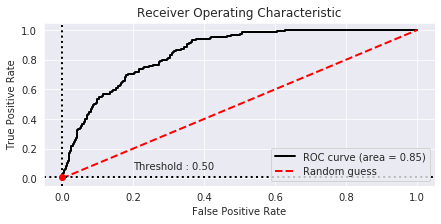

AUC_train: 0.907
AUC_test:  0.851
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------


In [11]:
## Wstępna ocena bazowych estymatorów (modeli)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

for t in base_clf:      # zamiast clf można dać t lub i 
    
    # Set seed
    if 'kot' in t.get_params().keys():  # pobierz z modeli, które chce trenować kluczowe hiperparametry 
        clf.set_params(random_state=SEED)  ## Podaje parametry PODSTAWOWE modelu, doyślne, fabryczne!!
                                           ## to znaczy, że jak podam specjalny hiperparament w modelu to będzie on uwzględniony             
    
    # Fit model
    t.fit(X_train, y_train) # Podstawiam do kolejnego modelu z pętli, uczy się kolejny model
    
    # Predict
    y_pred = t.predict(X_test)   #predykcja kolejnego modelu z pętli
    
    # Valuation
    acc = np.round(accuracy_score(y_test, y_pred),decimals=3)
    pre = np.round(precision_score(y_test, y_pred,average = 'macro'),decimals=3)
    auc = np.round(roc_auc_score(y_test, y_pred),decimals=3)
       
    print('{} Accuracy: {:.2f}%'.format(t.__class__.__name__, acc * 100))
    plt.figure(figsize=(7,3))
    y_probas1 = t.predict_proba(X_test)[:,1]
    bc= BinaryClassification(y_test, y_probas1, labels=[t.__class__.__name__]).plot_roc_curve()
    plt.show()
    #print('AUC: %s, precision: %s, accuracy: %s' % (auc, pre, acc))
    AUC_train_1 = metrics.roc_auc_score(y_train,t.predict_proba(X_train)[:,1])
    print('AUC_train: %.3f' % AUC_train_1)
    AUC_test_1 = metrics.roc_auc_score(y_test,t.predict_proba(X_test)[:,1])
    print('AUC_test:  %.3f' % AUC_test_1)
    print(classification_report(y_test, t.predict(X_test)))
    
    print('--------------------------------------------------------')  
    

### Create Hold Out predictions (meta-features).

In [12]:

def hold_out_predict(clf, X, y, cv):
        
    """Performing cross validation hold out predictions for stacking"""
    
    # USTALA WYMIARY
    n_classes = len(np.unique(y)) # Sprawdza jakie są klasy: len(np.unique(y)) = 2
    meta_features = np.zeros((X.shape[0], n_classes)) ## BUDUJE SZKIELEK WEKTORA META CECH 
                                         # Buduje wektor o ilości wierszy 10000 i 2 KOLUMN
                                         # składający się z samych zer
    n_splits = cv.get_n_splits(X, y)     # Zwraca liczbę iteracji podziału w walidatorze krzyżowym.= 4
    
    # Loop over folds
    print("Starting hold out prediction with {} splits for {}.".format(n_splits, clf.__class__.__name__))
    ## komunikat o rozpoczęciu budowy meta zmiennej n_split podaje ile ma być tych metazmiennych
    
    
    for train_idx, hold_out_idx in cv.split(X, y): 
        
        # Split data
        X_train = X[train_idx]                # Podmienia zmienne X_train w pętli
        y_train = y[train_idx]                # Podmienia zmienne y_train w pętli
        X_hold_out = X[hold_out_idx]
        
        # Fit estimator to K-1 parts and predict on hold out part
        est = make_copy(clf)
        est.fit(X_train, y_train)
        y_hold_out_pred = est.predict_proba(X_hold_out)
        
        # Fill in meta features
        meta_features[hold_out_idx] = y_hold_out_pred

    return meta_features     # meta wymiar to wektor 1000 na 2 kolumny składający się z samych zer

### Create meta-features for training data

In [13]:
SEED = 148

# Define 4-fold CV     ## można dać dowolną liczbę faud
cv = KFold(n_splits=4, random_state=SEED)    ## wpisuje ilości podziałow w cross-validation

# Loop over classifier to produce meta features
meta_train = []
for clf in base_clf:
    
    # Create hold out predictions for a classifier
    meta_train_clf = hold_out_predict(clf, X_train, y_train, cv)
    
    # Remove redundant column
    meta_train_clf = np.delete(meta_train_clf, 0, axis=1).ravel()
    
    # Gather meta training data
    meta_train.append(meta_train_clf)
    
meta_train = np.array(meta_train).T 


Starting hold out prediction with 4 splits for LogisticRegression.
Starting hold out prediction with 4 splits for RandomForestClassifier.
Starting hold out prediction with 4 splits for AdaBoostClassifier.
Starting hold out prediction with 4 splits for GaussianNB.
Starting hold out prediction with 4 splits for XGBClassifier.
Starting hold out prediction with 4 splits for LGBMClassifier.
Starting hold out prediction with 4 splits for CatBoostClassifier.


### Create meta-features for testing data

In [14]:

meta_test = []
for clf in base_clf:
    
    # Create hold out predictions for a classifier
    clf.fit(X_train, y_train)
    meta_test_clf = clf.predict_proba(X_test)
    
    # Remove redundant column
    meta_test_clf = np.delete(meta_test_clf, 0, axis=1).ravel()
    
    # Gather meta training data
    meta_test.append(meta_test_clf)
    
meta_test = np.array(meta_test).T 

### Predict on Stacking Classifier

AUC_train: 0.907
AUC_test:  0.851
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

Stacking LogisticRegression accuracy: 98.46%


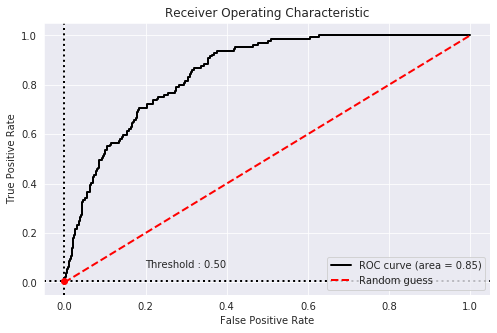

In [15]:

# Set seed
if 'random_state' in stck_clf.get_params().keys():
    stck_clf.set_params(random_state=SEED)

# Optional (Add original features to meta)
original_flag = False
if original_flag:
    meta_train = np.concatenate((meta_train, X_train), axis=1)
    meta_test = np.concatenate((meta_test, X_test), axis=1)

# Fit model
stck_clf.fit(meta_train, y_train)

# Predict
y_pred = stck_clf.predict(meta_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred,average = 'macro')
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,5))
y_probas1 = t.predict_proba(X_test)[:,1]
bc= BinaryClassification(y_test, y_probas1, labels=[t.__class__.__name__]).plot_roc_curve()

AUC_train_1 = metrics.roc_auc_score(y_train,t.predict_proba(X_train)[:,1])
print('AUC_train: %.3f' % AUC_train_1)
AUC_test_1 = metrics.roc_auc_score(y_test,t.predict_proba(X_test)[:,1])
print('AUC_test:  %.3f' % AUC_test_1)
print('--------------------------------------------------------')  
print(classification_report(y_test, t.predict(X_test)))
print('Stacking {} accuracy: {:.2f}%'.format(stck_clf.__class__.__name__, acc * 100))

# OVERSAMPLING

In [16]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    calss1 = np.round((sum(ytrain == 1)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    calss0 = np.round((sum(ytrain == 0)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    
    print("y = 0: ", sum(ytrain == 0),'-------',calss0,'%')
    print("y = 1: ", sum(ytrain == 1),'-------',calss1,'%')
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1)
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
       
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show

In [17]:
y = df['Stroke']
X = df.drop('Stroke', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

y = 0:  33036 ------- 98.0 %
y = 1:  514 ------- 2.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (33550, 10)
Before oversampling ytrain:      (33550,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (66446, 10)
After oversampling ytrain_OV:   (66446, 1)
--------------------------------------------------------


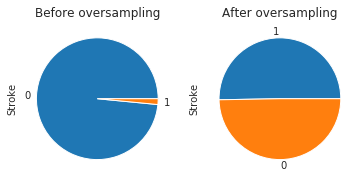

In [18]:
oversampling(y_train, X_train)

In [19]:
X_train = Xtrain_OV.values
X_test = X_test.values
y_train = ytrain_OV.values
y_test = y_test.values

## Ustalam estymatory pierwszego poziomu (level 0)

In [20]:
base_clf = [LogisticRegression(), ### jakie model chce trenować
            AdaBoostClassifier(), GaussianNB(),CatBoostClassifier(verbose=0, n_estimators=100),XGBClassifier(),LGBMClassifier(), RandomForestClassifier()]

stck_clf = LogisticRegression()  ### układanie w stos odbyw się za pomocą LogisticRegression
#stck_clf = RandomForestClassifier()

## Tworzymy prognozy pierwszego poziomu (level 0)

LogisticRegression Accuracy: 67.30%


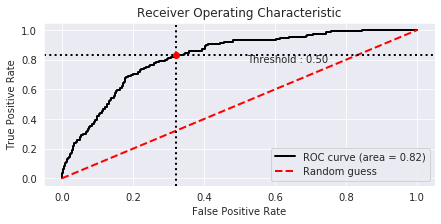

AUC_train: 0.817
AUC_test:  0.819
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      8259
           1       0.04      0.83      0.07       129

    accuracy                           0.67      8388
   macro avg       0.52      0.75      0.44      8388
weighted avg       0.98      0.67      0.79      8388

--------------------------------------------------------
AdaBoostClassifier Accuracy: 70.70%


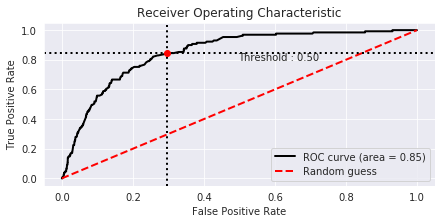

AUC_train: 0.871
AUC_test:  0.849
              precision    recall  f1-score   support

           0       1.00      0.70      0.83      8259
           1       0.04      0.84      0.08       129

    accuracy                           0.71      8388
   macro avg       0.52      0.77      0.45      8388
weighted avg       0.98      0.71      0.81      8388

--------------------------------------------------------
GaussianNB Accuracy: 71.10%


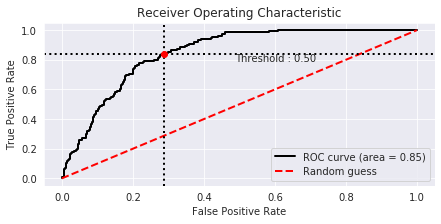

AUC_train: 0.840
AUC_test:  0.847
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      8259
           1       0.04      0.84      0.08       129

    accuracy                           0.71      8388
   macro avg       0.52      0.77      0.46      8388
weighted avg       0.98      0.71      0.82      8388

--------------------------------------------------------
CatBoostClassifier Accuracy: 88.60%


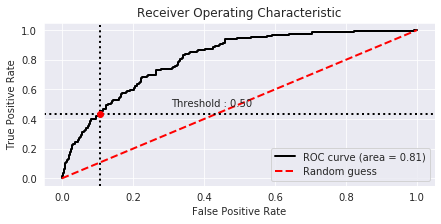

AUC_train: 0.986
AUC_test:  0.810
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      8259
           1       0.06      0.43      0.11       129

    accuracy                           0.89      8388
   macro avg       0.53      0.66      0.52      8388
weighted avg       0.98      0.89      0.93      8388

--------------------------------------------------------
XGBClassifier Accuracy: 94.00%


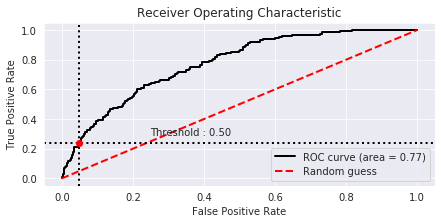

AUC_train: 0.999
AUC_test:  0.774
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8259
           1       0.07      0.24      0.11       129

    accuracy                           0.94      8388
   macro avg       0.53      0.60      0.54      8388
weighted avg       0.97      0.94      0.96      8388

--------------------------------------------------------
LGBMClassifier Accuracy: 86.20%


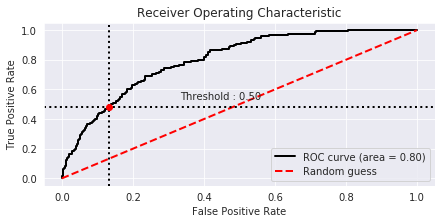

AUC_train: 0.985
AUC_test:  0.802
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      8259
           1       0.05      0.48      0.10       129

    accuracy                           0.86      8388
   macro avg       0.52      0.67      0.51      8388
weighted avg       0.98      0.86      0.91      8388

--------------------------------------------------------
RandomForestClassifier Accuracy: 98.40%


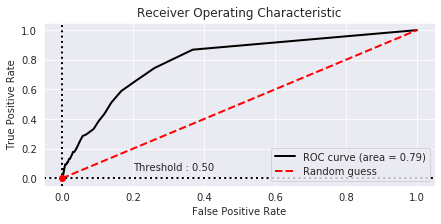

AUC_train: 1.000
AUC_test:  0.794
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

--------------------------------------------------------


In [21]:
## Wstępna ocena bazowych estymatorów (modeli)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

for t in base_clf:      # zamiast clf można dać t lub i 
    
    # Set seed
    if 'kot' in t.get_params().keys():  # pobierz z modeli, które chce trenować kluczowe hiperparametry 
        clf.set_params(random_state=SEED)  ## Podaje parametry PODSTAWOWE modelu, doyślne, fabryczne!!
                                           ## to znaczy, że jak podam specjalny hiperparament w modelu to będzie on uwzględniony             
    
    # Fit model
    t.fit(X_train, y_train) # Podstawiam do kolejnego modelu z pętli, uczy się kolejny model
    
    # Predict
    y_pred = t.predict(X_test)   #predykcja kolejnego modelu z pętli
    
    # Valuation
    acc = np.round(accuracy_score(y_test, y_pred),decimals=3)
    pre = np.round(precision_score(y_test, y_pred,average = 'macro'),decimals=3)
    auc = np.round(roc_auc_score(y_test, y_pred),decimals=3)
    
    plt.show
    print('{} Accuracy: {:.2f}%'.format(t.__class__.__name__, acc * 100))
    plt.figure(figsize=(7,3))
    y_probas1 = t.predict_proba(X_test)[:,1]
    bc= BinaryClassification(y_test, y_probas1, labels=[t.__class__.__name__]).plot_roc_curve()
    plt.show()
    
    #print('AUC: %s, precision: %s, accuracy: %s' % (auc, pre, acc))
    AUC_train_1 = metrics.roc_auc_score(y_train,t.predict_proba(X_train)[:,1])
    print('AUC_train: %.3f' % AUC_train_1)
    AUC_test_1 = metrics.roc_auc_score(y_test,t.predict_proba(X_test)[:,1])
    print('AUC_test:  %.3f' % AUC_test_1)
    print(classification_report(y_test, t.predict(X_test)))
    
    print('--------------------------------------------------------')  
    

### Create Hold Out predictions (meta-features)

In [22]:

def hold_out_predict(clf, X, y, cv):
        
    """Performing cross validation hold out predictions for stacking"""
    
    # USTALA WYMIARY
    n_classes = len(np.unique(y)) # Sprawdza jakie są klasy: len(np.unique(y)) = 2
    meta_features = np.zeros((X.shape[0], n_classes)) ## BUDUJE SZKIELEK WEKTORA META CECH 
                                         # Buduje wektor o ilości wierszy 10000 i 2 KOLUMN
                                         # składający się z samych zer
    n_splits = cv.get_n_splits(X, y)     # Zwraca liczbę iteracji podziału w walidatorze krzyżowym.= 4
    
    # Loop over folds
    print("Starting hold out prediction with {} splits for {}.".format(n_splits, clf.__class__.__name__))
    ## komunikat o rozpoczęciu budowy meta zmiennej n_split podaje ile ma być tych metazmiennych
    
    
    for train_idx, hold_out_idx in cv.split(X, y): 
        
        # Split data
        X_train = X[train_idx]                # Podmienia zmienne X_train w pętli
        y_train = y[train_idx]                # Podmienia zmienne y_train w pętli
        X_hold_out = X[hold_out_idx]
        
        # Fit estimator to K-1 parts and predict on hold out part
        est = make_copy(clf)
        est.fit(X_train, y_train)
        y_hold_out_pred = est.predict_proba(X_hold_out)
        
        # Fill in meta features
        meta_features[hold_out_idx] = y_hold_out_pred

    return meta_features     # meta wymiar to wektor 1000 na 2 kolumny składający się z samych zer

### Create meta-features for training data

In [23]:
SEED = 148

# Define 4-fold CV     ## można dać dowolną liczbę faud
cv = KFold(n_splits=4, random_state=SEED)    ## wpisuje ilości podziałow w cross-validation

# Loop over classifier to produce meta features
meta_train = []
for clf in base_clf:
    
    # Create hold out predictions for a classifier
    meta_train_clf = hold_out_predict(clf, X_train, y_train, cv)
    
    # Remove redundant column
    meta_train_clf = np.delete(meta_train_clf, 0, axis=1).ravel()
    
    # Gather meta training data
    meta_train.append(meta_train_clf)
    
meta_train = np.array(meta_train).T 


Starting hold out prediction with 4 splits for LogisticRegression.
Starting hold out prediction with 4 splits for AdaBoostClassifier.
Starting hold out prediction with 4 splits for GaussianNB.
Starting hold out prediction with 4 splits for CatBoostClassifier.
Starting hold out prediction with 4 splits for XGBClassifier.
Starting hold out prediction with 4 splits for LGBMClassifier.
Starting hold out prediction with 4 splits for RandomForestClassifier.


### Create meta-features for testing data

In [24]:
meta_test = []
for clf in base_clf:
    
    # Create hold out predictions for a classifier
    clf.fit(X_train, y_train)
    meta_test_clf = clf.predict_proba(X_test)
    
    # Remove redundant column
    meta_test_clf = np.delete(meta_test_clf, 0, axis=1).ravel()
    
    # Gather meta training data
    meta_test.append(meta_test_clf)
    
meta_test = np.array(meta_test).T 

### Predict on Stacking Classifier

AUC_train: 1.000
AUC_test:  0.411
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8259
           1       0.00      0.00      0.00       129

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388

Stacking LogisticRegression accuracy: 98.45%


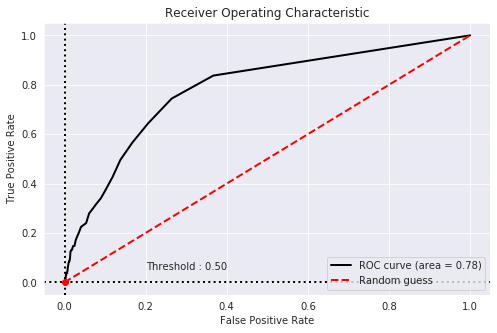

In [25]:
# Set seed
if 'random_state' in stck_clf.get_params().keys():
    stck_clf.set_params(random_state=SEED)

# Optional (Add original features to meta)
original_flag = False
if original_flag:
    meta_train = np.concatenate((meta_train, X_train), axis=1)
    meta_test = np.concatenate((meta_test, X_test), axis=1)

# Fit model
stck_clf.fit(meta_train, y_train)

# Predict
y_pred = stck_clf.predict(meta_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred,average = 'macro')
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,5))
y_probas1 = t.predict_proba(X_test)[:,1]
bc= BinaryClassification(y_test, y_probas1, labels=[t.__class__.__name__]).plot_roc_curve()

AUC_train_1 = metrics.roc_auc_score(y_train,stck_clf.predict_proba(meta_train)[:,1])
print('AUC_train: %.3f' % AUC_train_1)
AUC_test_1 = metrics.roc_auc_score(y_test,stck_clf.predict_proba(meta_test)[:,1])
print('AUC_test:  %.3f' % AUC_test_1)
print('--------------------------------------------------------')  
print(classification_report(y_test, stck_clf.predict(meta_test)))
print('Stacking {} accuracy: {:.2f}%'.format(stck_clf.__class__.__name__, acc * 100))

<span style = "color: black"> Oversampling significantly improved the quality of minority class prediction (1).
<span style = "color: black"> Threshold was in the middle of the chart.
### <span style = "color: black"> Previous result
    



<span style="color:green"> Oversampling istotnie poprawił jakość predykcji klasy mniejszościowej (1).
<span style="color:green"> Próg Threshold znalazł sie na środku wykresu.
### <span style="color:green"> Poprzedni wynik

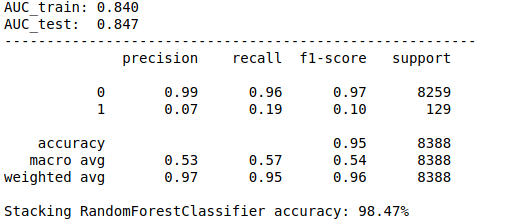

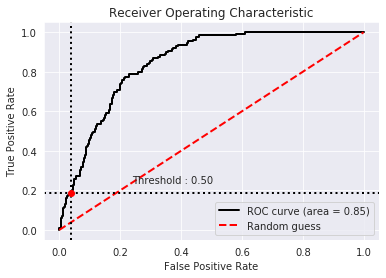

## Eliminates some models from the stack

In [26]:
base_clf = [LogisticRegression(),AdaBoostClassifier(),CatBoostClassifier(verbose=0, n_estimators=100), GaussianNB()]

stck2_clf = LogisticRegression()  ### układanie w stos odbyw się za pomocą LogisticRegression
#stck_clf = RandomForestClassifier()

## Tworzymy prognozy pierwszego poziomu (level 0)

LogisticRegression Accuracy: 67.30%


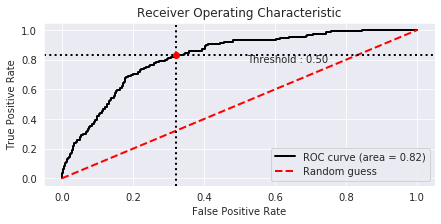

AUC_train: 0.817
AUC_test:  0.819
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      8259
           1       0.04      0.83      0.07       129

    accuracy                           0.67      8388
   macro avg       0.52      0.75      0.44      8388
weighted avg       0.98      0.67      0.79      8388

--------------------------------------------------------
AdaBoostClassifier Accuracy: 70.70%


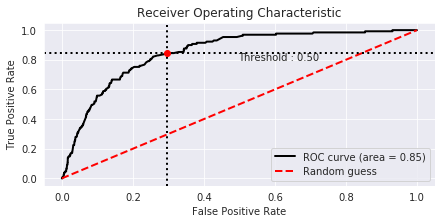

AUC_train: 0.871
AUC_test:  0.849
              precision    recall  f1-score   support

           0       1.00      0.70      0.83      8259
           1       0.04      0.84      0.08       129

    accuracy                           0.71      8388
   macro avg       0.52      0.77      0.45      8388
weighted avg       0.98      0.71      0.81      8388

--------------------------------------------------------
CatBoostClassifier Accuracy: 88.60%


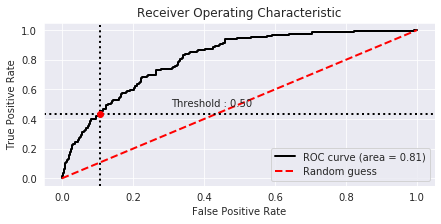

AUC_train: 0.986
AUC_test:  0.810
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      8259
           1       0.06      0.43      0.11       129

    accuracy                           0.89      8388
   macro avg       0.53      0.66      0.52      8388
weighted avg       0.98      0.89      0.93      8388

--------------------------------------------------------
GaussianNB Accuracy: 71.10%


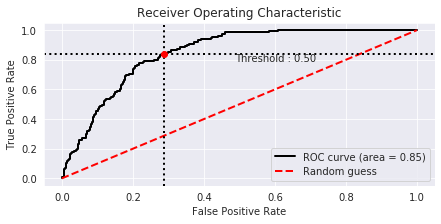

AUC_train: 0.840
AUC_test:  0.847
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      8259
           1       0.04      0.84      0.08       129

    accuracy                           0.71      8388
   macro avg       0.52      0.77      0.46      8388
weighted avg       0.98      0.71      0.82      8388

--------------------------------------------------------


In [27]:
## Wstępna ocena bazowych estymatorów (modeli)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

for t in base_clf:      # zamiast clf można dać t lub i 
    
    # Set seed
    if 'kot' in t.get_params().keys():  # pobierz z modeli, które chce trenować kluczowe hiperparametry 
        clf.set_params(random_state=SEED)  ## Podaje parametry PODSTAWOWE modelu, doyślne, fabryczne!!
                                           ## to znaczy, że jak podam specjalny hiperparament w modelu to będzie on uwzględniony             
    
    # Fit model
    t.fit(X_train, y_train) # Podstawiam do kolejnego modelu z pętli, uczy się kolejny model
    
    # Predict
    y_pred = t.predict(X_test)   #predykcja kolejnego modelu z pętli
    
    # Valuation
    acc = np.round(accuracy_score(y_test, y_pred),decimals=3)
    pre = np.round(precision_score(y_test, y_pred,average = 'macro'),decimals=3)
    auc = np.round(roc_auc_score(y_test, y_pred),decimals=3)
    
    plt.show
    print('{} Accuracy: {:.2f}%'.format(t.__class__.__name__, acc * 100))
    plt.figure(figsize=(7,3))
    y_probas1 = t.predict_proba(X_test)[:,1]
    bc= BinaryClassification(y_test, y_probas1, labels=[t.__class__.__name__]).plot_roc_curve()
    plt.show()
    
    #print('AUC: %s, precision: %s, accuracy: %s' % (auc, pre, acc))
    AUC_train_1 = metrics.roc_auc_score(y_train,t.predict_proba(X_train)[:,1])
    print('AUC_train: %.3f' % AUC_train_1)
    AUC_test_1 = metrics.roc_auc_score(y_test,t.predict_proba(X_test)[:,1])
    print('AUC_test:  %.3f' % AUC_test_1)
    print(classification_report(y_test, t.predict(X_test)))
    
    print('--------------------------------------------------------')  
    

### Create Hold Out predictions (meta-features)

In [28]:

def hold_out_predict(clf, X, y, cv):
        
    """Performing cross validation hold out predictions for stacking"""
    
    # USTALA WYMIARY
    n_classes = len(np.unique(y)) # Sprawdza jakie są klasy: len(np.unique(y)) = 2
    meta_features = np.zeros((X.shape[0], n_classes)) ## BUDUJE SZKIELEK WEKTORA META CECH 
                                         # Buduje wektor o ilości wierszy 10000 i 2 KOLUMN
                                         # składający się z samych zer
    n_splits = cv.get_n_splits(X, y)     # Zwraca liczbę iteracji podziału w walidatorze krzyżowym.= 4
    
    # Loop over folds
    print("Starting hold out prediction with {} splits for {}.".format(n_splits, clf.__class__.__name__))
    ## komunikat o rozpoczęciu budowy meta zmiennej n_split podaje ile ma być tych metazmiennych
    
    
    for train_idx, hold_out_idx in cv.split(X, y): 
        
        # Split data
        X_train = X[train_idx]                # Podmienia zmienne X_train w pętli
        y_train = y[train_idx]                # Podmienia zmienne y_train w pętli
        X_hold_out = X[hold_out_idx]
        
        # Fit estimator to K-1 parts and predict on hold out part
        est = make_copy(clf)
        est.fit(X_train, y_train)
        y_hold_out_pred = est.predict_proba(X_hold_out)
        
        # Fill in meta features
        meta_features[hold_out_idx] = y_hold_out_pred

    return meta_features     # meta wymiar to wektor 1000 na 2 kolumny składający się z samych zer

### Create meta-features for training data

In [47]:
SEED = 148

# Define 4-fold CV     ## można dać dowolną liczbę faud
cv = KFold(n_splits=15, random_state=SEED)    ## wpisuje ilości podziałow w cross-validation

# Loop over classifier to produce meta features
meta_train = []
for clf in base_clf:
    
    # Create hold out predictions for a classifier
    meta_train_clf = hold_out_predict(clf, X_train, y_train, cv)
    
    # Remove redundant column
    meta_train_clf = np.delete(meta_train_clf, 0, axis=1).ravel()
    
    # Gather meta training data
    meta_train.append(meta_train_clf)
    
meta_train = np.array(meta_train).T 


Starting hold out prediction with 15 splits for LogisticRegression.
Starting hold out prediction with 15 splits for AdaBoostClassifier.
Starting hold out prediction with 15 splits for CatBoostClassifier.
Starting hold out prediction with 15 splits for GaussianNB.


### Create meta-features for testing data

In [30]:
meta_test = []
for clf in base_clf:
    
    # Create hold out predictions for a classifier
    clf.fit(X_train, y_train)
    meta_test_clf = clf.predict_proba(X_test)
    
    # Remove redundant column
    meta_test_clf = np.delete(meta_test_clf, 0, axis=1).ravel()
    
    # Gather meta training data
    meta_test.append(meta_test_clf)
    
meta_test = np.array(meta_test).T 

### Predict on Stacking Classifier

In [48]:
# Set seed
if 'random_state' in stck2_clf.get_params().keys():
    stck2_clf.set_params(random_state=SEED)


    
    # Optional (Add original features to meta)
#original_flag = False
#if original_flag:
    #meta_train = np.concatenate((meta_train, X_train), axis=1)
    #meta_test = np.concatenate((meta_test, X_test), axis=1)

# Fit model
stck2_clf.fit(meta_train, y_train)

# Predict
y_pred = stck2_clf.predict(meta_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred,average = 'macro')
auc = roc_auc_score(y_test, y_pred)


print('Stacking {} accuracy: {:.2f}%'.format(stck2_clf.__class__.__name__, acc * 100))
#print('Stacking {} precision: {:.2f}%'.format(stck2_clf.__class__.__name__, pre * 100))
print('Stacking {} oc_auc: {:.2f}%'.format(stck2_clf.__class__.__name__, auc * 100))

AUC_train_1 = metrics.roc_auc_score(y_train,stck2_clf.predict_proba(meta_train)[:,1])
print('AUC_train: %.3f' % AUC_train_1)
AUC_test_1 = metrics.roc_auc_score(y_test,stck2_clf.predict_proba(meta_test)[:,1])
print('AUC_test:  %.3f' % AUC_test_1)
print('--------------------------------------------------------')  
print(classification_report(y_test, stck2_clf.predict(meta_test)))

Stacking LogisticRegression accuracy: 93.26%
Stacking LogisticRegression oc_auc: 60.33%
AUC_train: 0.985
AUC_test:  0.630
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8259
           1       0.07      0.26      0.11       129

    accuracy                           0.93      8388
   macro avg       0.53      0.60      0.54      8388
weighted avg       0.97      0.93      0.95      8388



array([0.00959614, 0.00962697, 0.00959061, ..., 0.00185905, 0.00065865,
       0.0022625 ])

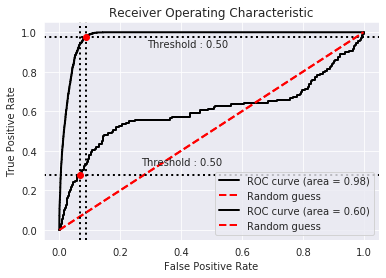

In [46]:
y_probas1 = stck2_clf.predict_proba(meta_train)[:,1]
bc= BinaryClassification(y_train, y_probas1, labels=[stck2_clf]).plot_roc_curve()
y_probas1

y_probas2 = stck2_clf.predict_proba(meta_test)[:,1]
bc= BinaryClassification(y_test, y_probas2, labels=['y_test']).plot_roc_curve()
y_probas2

Jak widać problem leży w przeuczeniu modelu - model jest fatalny dla danych których teoretycznie nie zna